Homework1

In [1]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=5b14457e91484b4fdb6426421cc65fa33b660723689625ae409acff98da5d87f
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [2]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
from lifelines import KaplanMeierFitter  # Importing Kaplan-Meier estimator from lifelines
from lifelines.statistics import logrank_test  # Importing log-rank test for survival comparison

In [3]:
# import files

from google.colab import files
uploaded=files.upload()

Saving GBM_MGMT_expression_levels_data.csv to GBM_MGMT_expression_levels_data.csv


In [4]:
pd_data=pd.read_csv('/content/GBM_MGMT_expression_levels_data.csv')
pd_data.head()

,Placebo+TMZ,Mi1+TMZ,Mi2+TMZ,Mi3+TMZ
0,102.980285,26.389760,67.124955,70.582465
1,99.170414,41.113669,68.886046,75.811870
2,103.886131,29.919017,63.361990,65.787681
3,109.138179,23.653734,62.822760,68.034027
4,98.595080,34.935269,74.875155,67.647351


# **Problem #1**

# **1.1 Visual Comparison**

<ipython-input-5-d985554a3e05>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=columns)


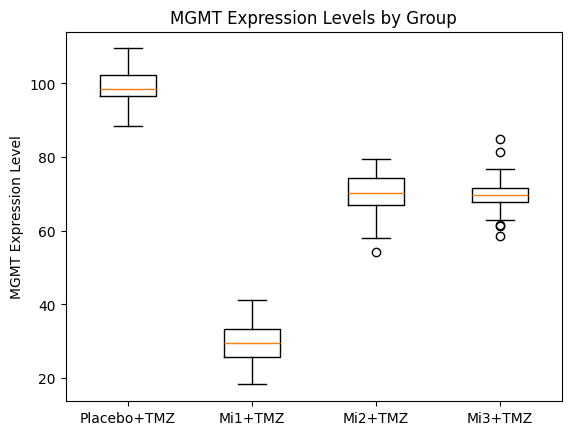

In [5]:
import matplotlib.pyplot as plt

# Specify the columns you want to plot
columns = ['Placebo+TMZ', 'Mi1+TMZ', 'Mi2+TMZ', 'Mi3+TMZ']

# Gather the data for each column into a list of lists
data_to_plot = [pd_data[col] for col in columns]

# Create a single boxplot with all groups side by side
plt.boxplot(data_to_plot, labels=columns)
plt.title('MGMT Expression Levels by Group')
plt.ylabel('MGMT Expression Level')
plt.show()


# **1.2. 1-way ANOVA**

In [6]:
pd_data.head()

,Placebo+TMZ,Mi1+TMZ,Mi2+TMZ,Mi3+TMZ
0,102.980285,26.389760,67.124955,70.582465
1,99.170414,41.113669,68.886046,75.811870
2,103.886131,29.919017,63.361990,65.787681
3,109.138179,23.653734,62.822760,68.034027
4,98.595080,34.935269,74.875155,67.647351


In [7]:

from scipy.stats import f_oneway
a=pd_data['Placebo+TMZ']
b=pd_data['Mi1+TMZ']
c=pd_data['Mi2+TMZ']
d=pd_data['Mi3+TMZ']
print(f_oneway(a, b, c,d), '\n')

F_onewayResult(statistic=782.8699434287794, pvalue=8.787050540043206e-77) 



Very small p-value: The probability that this statistics difference happened by random chance is almost zero.So, the drugs indeed had differet impact

# **1.3 Tukey's HSD**

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
# Convert the data to long format which is required by tukey's hsd
df_long = pd.melt(pd_data, value_vars=columns,
                  var_name='Group', value_name='MGMT_expression')

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df_long['MGMT_expression'],
                                 groups=df_long['Group'],
                                 alpha=0.05)

print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2   meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Mi1+TMZ     Mi2+TMZ  40.8043    0.0 37.0339 44.5747   True
Mi1+TMZ     Mi3+TMZ  40.6055    0.0 36.8351 44.3758   True
Mi1+TMZ Placebo+TMZ  69.5981    0.0 65.8277 73.3685   True
Mi2+TMZ     Mi3+TMZ  -0.1988 0.9991 -3.9692  3.5715  False
Mi2+TMZ Placebo+TMZ  28.7938    0.0 25.0234 32.5642   True
Mi3+TMZ Placebo+TMZ  28.9926    0.0 25.2223  32.763   True
----------------------------------------------------------


# **Problem #2**